In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
df=pd.read_csv('healthcare_dataset.csv')

In [5]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [ ]:
#The 
df

In [7]:
#the insurance provider
df['Insurance Provider'].unique()

array(['Medicare', 'UnitedHealthcare', 'Aetna', 'Cigna', 'Blue Cross'],
      dtype=object)

In [8]:
#the medical condition 
df['Medical Condition'].unique()

array(['Diabetes', 'Asthma', 'Obesity', 'Arthritis', 'Hypertension',
       'Cancer'], dtype=object)

In [25]:
#info of the admission type 
df['Admission Type'].unique()

array(['Elective', 'Emergency', 'Urgent'], dtype=object)

In [26]:
#the info of the medication 
df['Medication'].unique()

array(['Aspirin', 'Lipitor', 'Penicillin', 'Paracetamol', 'Ibuprofen'],
      dtype=object)

In [11]:
df['Room Number'].unique()

array([146, 404, 292, 480, 477, 180, 161, 384, 215, 310, 306, 126, 444,
       492, 120, 315, 475, 125, 366, 238, 364, 130, 293, 379, 298, 392,
       162, 456, 197, 247, 228, 137, 192, 258, 219, 414, 110, 465, 469,
       182, 119, 388, 412, 359, 186, 437, 132, 271, 361, 303, 317, 439,
       153, 438, 380, 194, 199, 301, 223, 410, 205, 134, 407, 188, 213,
       405, 358, 147, 115, 436, 263, 493, 460, 356, 142, 139, 482, 141,
       397, 347, 245, 143, 108, 268, 176, 462, 484, 329, 335, 201, 309,
       389, 217, 299, 275, 181, 401, 214, 267, 211, 184, 140, 416, 179,
       289, 350, 104, 220, 464, 419, 445, 398, 336, 413, 145, 148, 432,
       430, 406, 295, 175, 409, 424, 168, 136, 459, 261, 257, 170, 451,
       372, 202, 394, 264, 279, 260, 499, 452, 365, 340, 360, 290, 103,
       187, 378, 334, 470, 252, 450, 106, 259, 344, 489, 276, 155, 455,
       425, 400, 127, 333, 443, 129, 164, 486, 440, 265, 193, 222, 488,
       472, 391, 230, 322, 272, 154, 236, 375, 221, 244, 287, 24

In [15]:
#the doctors and the number of patients attended to by each doctor
df['Doctor'].value_counts()[:15]#15 doctors were evaluated

Michael Johnson      7
Robert Brown         5
Michelle Anderson    5
Matthew Smith        5
Jennifer Smith       5
James Williams       5
James Perez          5
Michael Smith        5
David Johnson        4
Christopher Davis    4
Robert Miller        4
William Rodriguez    4
Christopher Jones    4
Michael Brown        4
Ashley Jackson       4
Name: Doctor, dtype: int64

Michael johnson had the highest number of patient of about 7 
while other doctors had a range of 5-4 patient to attend to by time

In [17]:
#blood type by each partient visting the doctor a
df['Blood Type'].value_counts()

AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: Blood Type, dtype: int64

The AB- had had the highest patient with such blood type, about 1275 patient had the the blood type 

A- It had the lowest, About 1238 patient had the A- blood type 

In [18]:
#group the patient based on medical condition and how it affects their billing amounts
#insurance provider how it is affected by their billing amount
#The patient admission type, the impact of insurance provider on the admission type 
#The medication dispersed, if it is suitable for the illness
#The biliing amount by each insurance provider for each disease
#The gender with the highest frequency to the hospital
#the gender and medical condition, test results, medication, blood type, admission type amd insurance provider
#The different condition and how it affects the admission and discharge date 
#Days of stay or admission time per age group, the medical condition per days of admission
#the test results of all patient on admission, relationship between the test result and medical condition
#draw boxplot for all the data
#Group the age and then use it to determine its counts, it gender value count,the medical condition among the age group

In [19]:
#checking the test results 
df['Test Results'].unique()

array(['Inconclusive', 'Normal', 'Abnormal'], dtype=object)

In [23]:
#describtion of the data
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [24]:
#Admission type 
df['Admission Type'].value_counts()

Urgent       3391
Emergency    3367
Elective     3242
Name: Admission Type, dtype: int64

The Urgent Admission type can be seen to be the most used by the people 

In [70]:
#the count of the number of times the Insurance provider was used 
df['Insurance Provider'].value_counts()

Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: Insurance Provider, dtype: int64

The cigna Insurance provider was the most used 

# Exploration of Data 

## Age and it's impact on the dataset

In [101]:
df['Age'].value_counts()


59    175
78    174
31    172
20    169
35    169
     ... 
34    125
47    125
85    123
22    123
45    120
Name: Age, Length: 68, dtype: int64

In [32]:
def age_groups(col):
    non = []
    for i in col:
        if isinstance(i, (int, float)) and not math.isnan(i):  # Check if i is a valid number
            if i <= 30:
                non.append('18-30')
            elif i <= 40:
                non.append('31-40')
            elif i <= 50:
                non.append('41-50')
        else:
            print(f"Encountered invalid value: {i}")  # Print invalid values
            non.append(None)  # or any other value to signify missing or invalid data
    return non
df['age group'] = age_groups(df['Age'])


ValueError: Length of values (4796) does not match length of index (10000)

# Visualization of the Data

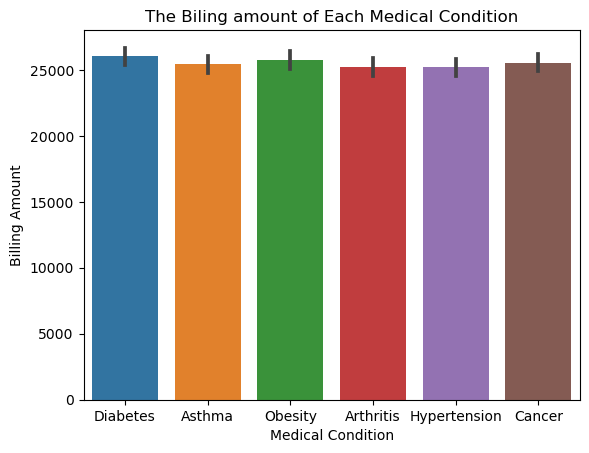

In [33]:
#The relationship between the medical condition and the billing amount
plt.title('The Biling amount of Each Medical Condition')
sns.barplot(data=df, x= 'Medical Condition', y='Billing Amount')
plt.show()

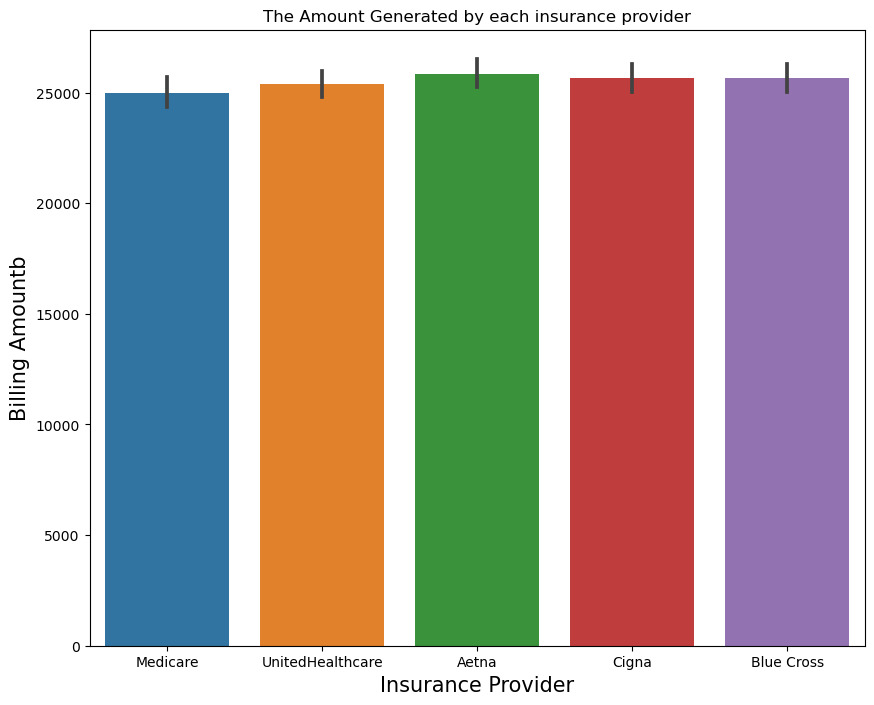

In [55]:
#The amount of money generated by each insurance provider
plt.figure(figsize=(10, 8))
plt.title('The Amount Generated by each insurance provider')
sns.barplot(data=df, x='Insurance Provider', y='Billing Amount')
plt.xlabel('Insurance Provider', fontsize=15)
plt.ylabel('Billing Amountb', fontsize=15)
plt.show()

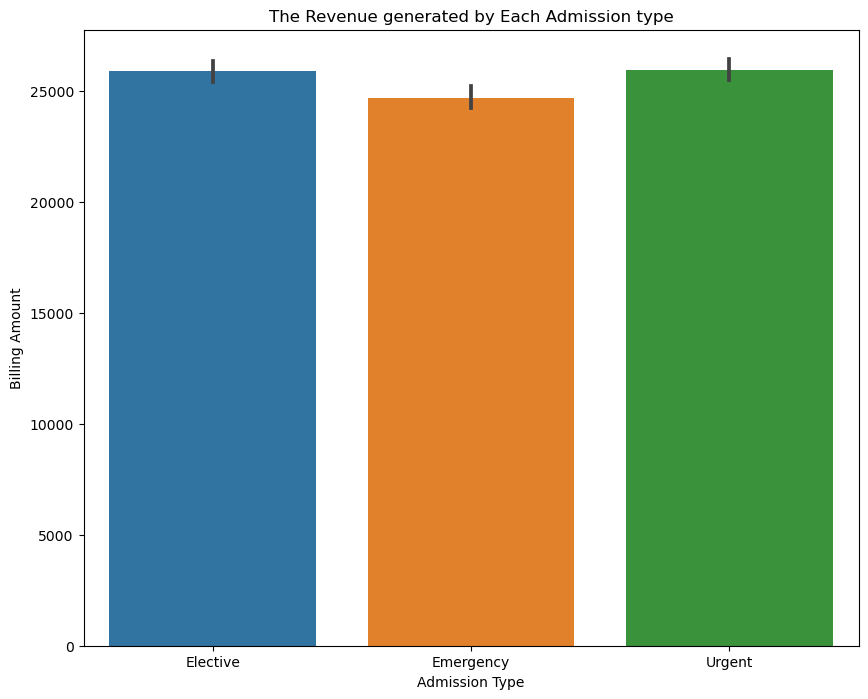

In [56]:
#The Admission type and amount generated 
plt.figure(figsize=(10,8))
plt.title('The Revenue generated by Each Admission type')
sns.barplot(data=df, x= 'Admission Type', y='Billing Amount')
plt.show()

The Elective Admission type generated more income to the hospital than the other types of admission type. 
It also shows that the emergency method of admission made the list amount of money 

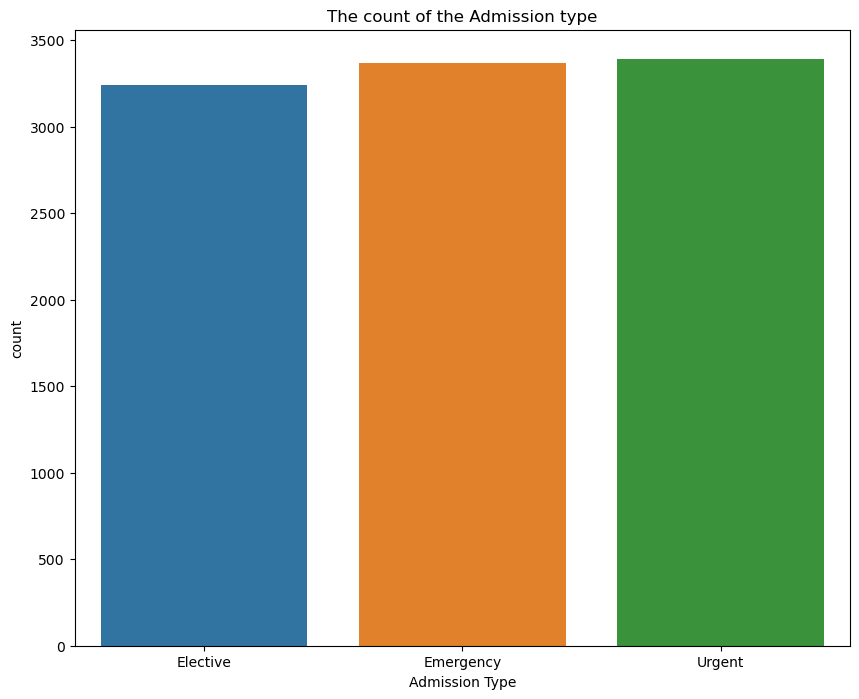

In [68]:
#The count of the Admission type
plt.figure(figsize=(10,8))
plt.title('The count of the Admission type')
sns.countplot(data=df, x='Admission Type')
plt.show()

TypeError: Horizontal orientation requires numeric `x` variable.

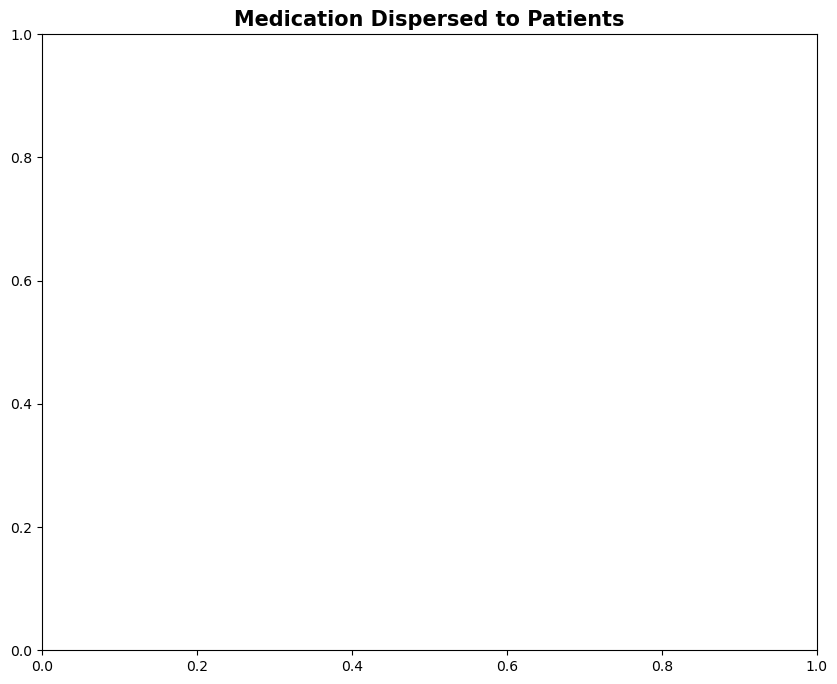

In [78]:
plt.figure(figsize=(10, 8))
plt.title('Medication Dispersed to Patients', fontsize=15, fontweight="bold")
sns.barplot(data=df, x='Medication', hue='Medical Condition')
plt.xlabel('Medication', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Patient', loc='upper right')
plt.show()

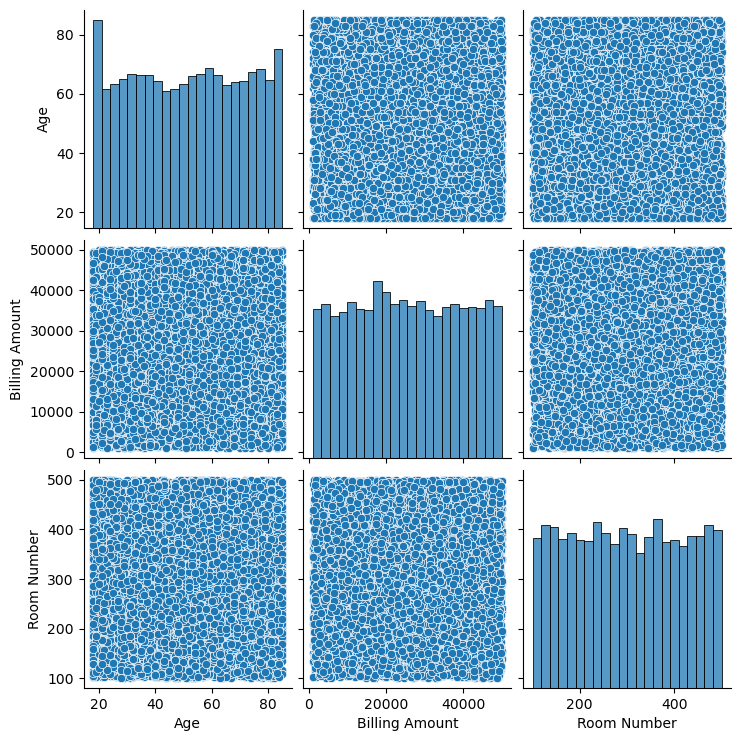

In [28]:
#a pair plot displaying the age, billing amount and the room number
sns.pairplot(data=df)

<Axes: >

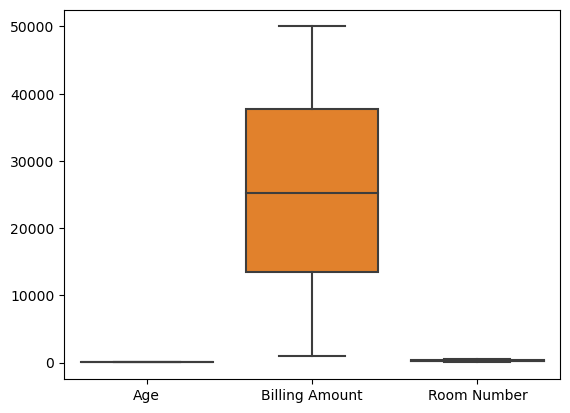

In [30]:
#comparing the Age range, billing amount and room number
sns.boxplot(data=df)